In [ ]:
path = '/Users/venkat/data-606/flights_data_processed_cleaned.csv'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(path)

In [4]:
df.columns

Index(['elapsedDays', 'isBasicEconomy', 'isRefundable', 'isNonStop',
       'baseFare', 'seatsRemaining', 'totalTravelDistance',
       'days_until_flight', 'travelhours', 'dephour', 'arrhour', 'DL', 'AA',
       'B6', 'UA', 'F9', 'AS', '4B', 'SY', '9K', '9X', 'KG', 'LF', '3M', 'HA',
       'startingAirport_BOS', 'startingAirport_CLT', 'startingAirport_DEN',
       'startingAirport_DFW', 'startingAirport_DTW', 'startingAirport_EWR',
       'startingAirport_IAD', 'startingAirport_JFK', 'startingAirport_LAX',
       'startingAirport_LGA', 'startingAirport_MIA', 'startingAirport_OAK',
       'startingAirport_ORD', 'startingAirport_PHL', 'startingAirport_SFO',
       'destinationAirport_BOS', 'destinationAirport_CLT',
       'destinationAirport_DEN', 'destinationAirport_DFW',
       'destinationAirport_DTW', 'destinationAirport_EWR',
       'destinationAirport_IAD', 'destinationAirport_JFK',
       'destinationAirport_LAX', 'destinationAirport_LGA',
       'destinationAirport_MIA', 'destin

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
X = df.drop(columns=['baseFare'])
y = df['baseFare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

continuous_features = ['totalTravelDistance', 'elapsedDays', 'days_until_flight', 'travelhours']


scaler = StandardScaler()

X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])


In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42, verbose=3)

rf_regressor.fit(X_train, y_train)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:  3.4min


building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


RandomForestRegressor(n_estimators=50, random_state=42, verbose=3)

In [36]:
y_pred = rf_regressor.predict(X_test)

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   35.3s


In [38]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7886.123395648749


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

In [42]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 56.59261618189094
Mean Squared Error: 7886.123395648749
Root Mean Squared Error: 88.8038478651052
R² Score: 0.7654823656232584


                     Feature  Importance
5        totalTravelDistance    0.268577
1             isBasicEconomy    0.119748
7                travelhours    0.101370
6          days_until_flight    0.091410
10                        DL    0.062487
63  strcabin_coachcoachcoach    0.033807
13                        UA    0.032138
9                    arrhour    0.028977
4             seatsRemaining    0.027244
8                    dephour    0.026951


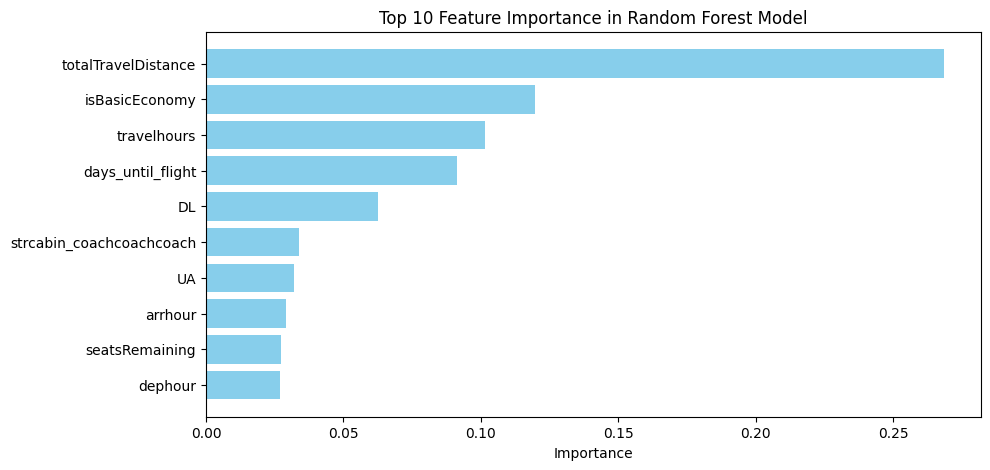

In [ ]:
importances = rf_regressor.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df.head(10)

print(top_10_features)

plt.figure(figsize=(10, 5))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()